In [6]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
#Scikit learn for ML tools like PCA, SVM, train-test splitting
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score,recall_score,f1_score,classification_report

In [7]:
# Define classes and their labels
classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'glioma_tumor': 2, 'meningioma_tumor': 3}

# Load and preprocess the dataset
X = []
Y = []
for cls, label in classes.items(): #traversing thru image and its labels
    pth = f"C:\\Users\\Ayati\\Downloads\\archive (1)\\Training\\{cls}"
    for filename in os.listdir(pth): #each img in each folder
        img = cv2.imread(os.path.join(pth, filename), 0) #loads
        img = cv2.resize(img, (200, 200))  #resizes to smaller scale
        X.append(img.flatten() / 255.0)  # Flattend and normalized images list 
        #divides by 255 for normalisation, as ml models need values 0-1
        Y.append(label) #labels list
X = np.array(X) #converting to np array for ml computation
Y = np.array(Y)

In [20]:
# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10, test_size=0.8) 
#80% training

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.98) #find sum of most important (high variance features) that add up to 98% of information PRINCIPLE COMPONENTS
pca_train = pca.fit_transform(xtrain) #predicts labels for input x
    #fit learns and picks the 300 important features
    #transform into reduced dimensions based on the imp features
pca_test = pca.transform(xtest) #only separates

# Train Support Vector Classifier
sv = SVC(kernel='linear')
sv.fit(pca_train, ytrain) #(reduced dimensions images, og labels)
print(sv.kernel) #RBF OR LINEAR
#lower accuracy for linear, higher for rbf

# Evaluate accuracy of the model
train_score = sv.score(pca_train, ytrain) #calculating accuracy based on train learning
test_score = sv.score(pca_test, ytest) #no fitting or learning for test data, just calculating accuracy based on what was alr learned
print("Training Score:", train_score) #checks how well model learnt, accuracy in trianing
print("Testing Score:", test_score) #accuracy in testing data


linear
Training Score: 1.0
Testing Score: 0.7234320557491289


In [22]:
# Predict test labels
y_pred = sv.predict(pca_test)
labels = np.unique(ytest)

# Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
print("\nCONFUSION MATRIX")
print(cm)

# Classification Report (Precision, Recall, F1 for each class)
print("\nCLASSIFICATION REPORT")
print(classification_report(ytest, y_pred))



CONFUSION MATRIX
[[184  36  23  74]
 [ 11 617  27  24]
 [  5  10 495 133]
 [ 64  44 184 365]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.70      0.58      0.63       317
           1       0.87      0.91      0.89       679
           2       0.68      0.77      0.72       643
           3       0.61      0.56      0.58       657

    accuracy                           0.72      2296
   macro avg       0.72      0.70      0.71      2296
weighted avg       0.72      0.72      0.72      2296



In [23]:
y_pred = sv.predict(pca_test)
labels = np.unique(ytest)
cm = confusion_matrix(ytest, y_pred, labels=labels)

# Accuracy and F1
accuracy = accuracy_score(ytest, y_pred) * 100
f1 = f1_score(ytest, y_pred, average='macro') * 100  # or 'weighted'

# Sensitivity (Recall) per class
sensitivity_per_class = []
specificity_per_class = []

for i, label in enumerate(labels):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    sensitivity_per_class.append(sensitivity * 100)
    specificity_per_class.append(specificity * 100)

# Display
print(f"\nAccuracy: {accuracy:.2f}%")
print(f"F1 Score (macro): {f1:.2f}%\n")

for i, label in enumerate(labels):
    print(f"Class {label} - Sensitivity: {sensitivity_per_class[i]:.2f}%, Specificity: {specificity_per_class[i]:.2f}%")



Accuracy: 72.34%
F1 Score (macro): 70.70%

Class 0 - Sensitivity: 58.04%, Specificity: 95.96%
Class 1 - Sensitivity: 90.87%, Specificity: 94.43%
Class 2 - Sensitivity: 76.98%, Specificity: 85.84%
Class 3 - Sensitivity: 55.56%, Specificity: 85.91%


In [ ]:
# Display sample images and predictions
def display_samples(folder, title, num_samples=9): #shows 9 sample predictions from each test folder w predicted tumor type
    plt.figure(figsize=(12,8)) #blank figure 
    c = 1
    for i, filename in enumerate(os.listdir(folder)[:num_samples]):
        img = cv2.imread(os.path.join(folder, filename), 0)
        img = cv2.resize(img, (200, 200)).flatten() / 255.0  # Preprocess the test image
        prediction = sv.predict(pca.transform([img]))  # Predict using the trained SVM
        dec = {0: 'No Tumor', 1: 'Pituitary Tumor', 2: 'Glioma Tumor', 3: 'Meningioma Tumor'}
        plt.subplot(3, 3, c)
        plt.title(dec[prediction[0]])  # Map prediction to human-readable label
        plt.imshow(img.reshape(200, 200), cmap='gray')  # Display the image
        plt.axis('off')
        c += 1
    plt.suptitle(title)
    plt.show()

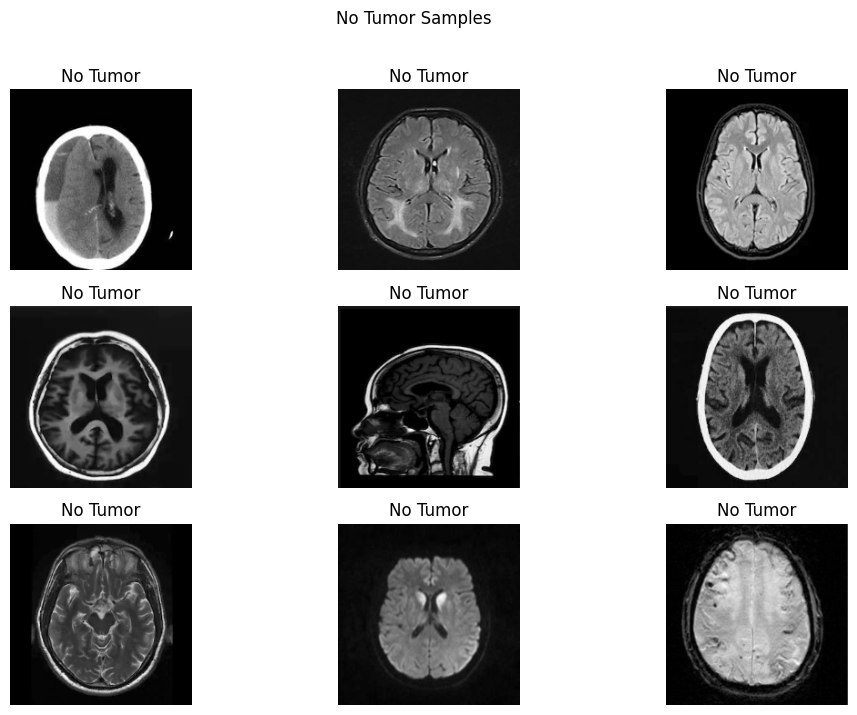

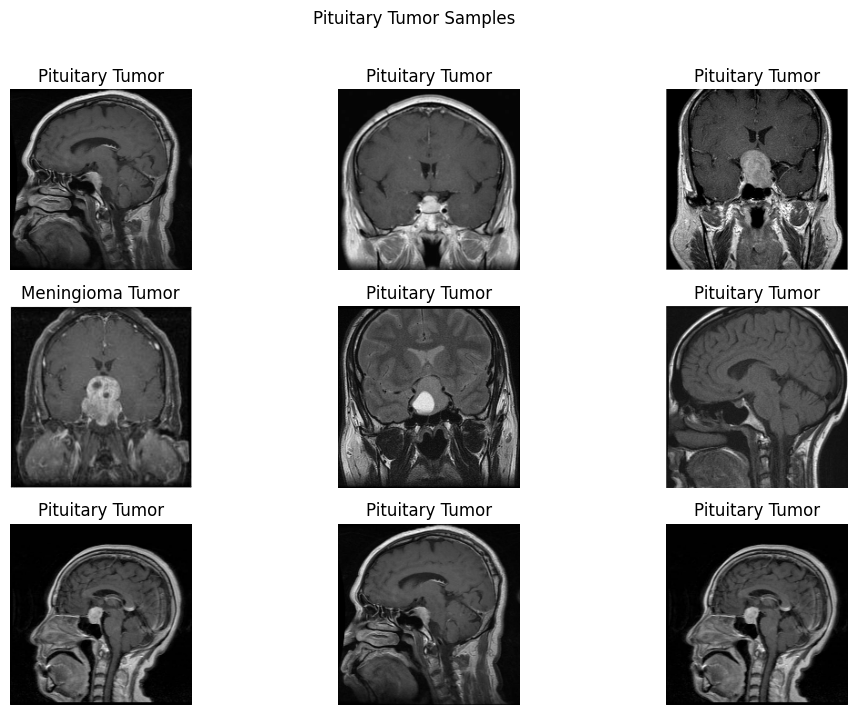

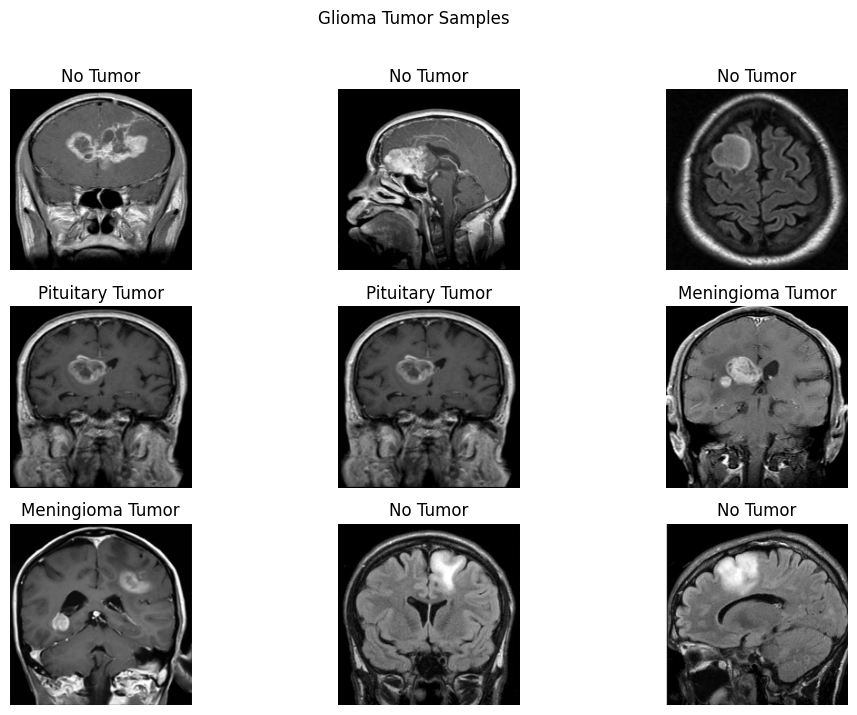

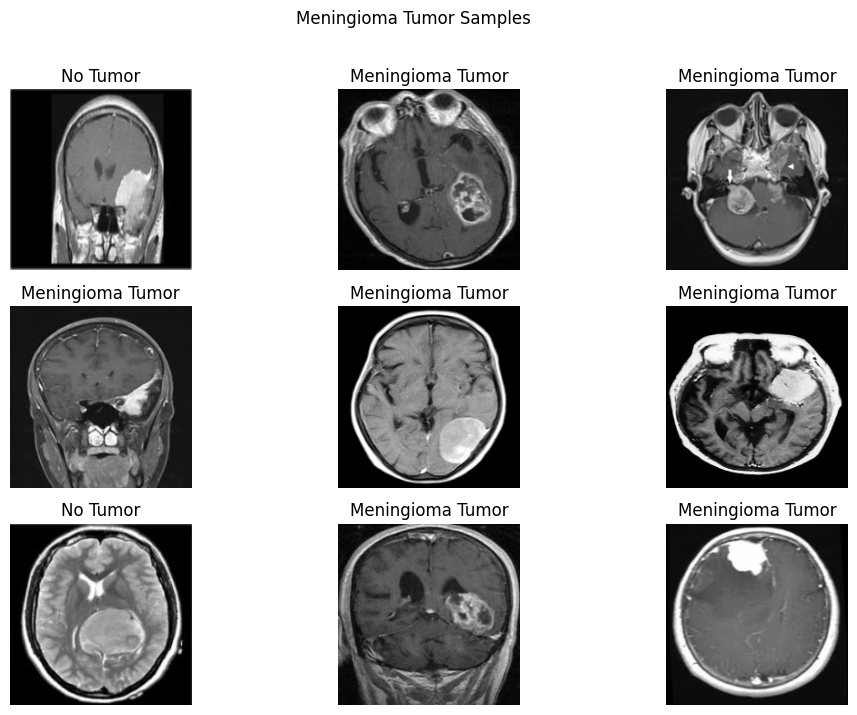

In [5]:
# Define class labels
dec = {0: 'No Tumor', 1: 'Pituitary Tumor', 2: 'Glioma Tumor', 3: 'Meningioma Tumor'}
# Display sample images and predictions for each tumor type

tumor_folders = ['no_tumor', 'pituitary_tumor', 'glioma_tumor', 'meningioma_tumor']
for tumor_folder in tumor_folders:
    folder_path = f"C:\\Users\\Ayati\\Downloads\\archive (1)\\Testing\\{tumor_folder}\\"
    title = f'{tumor_folder.replace("_", " ").title()} Samples'
    display_samples(folder_path, title)

In [6]:
# Count the occurrences of each tumor type
tumor_counts = {dec[label]: np.sum(Y == label) for label in classes.values()}
print(tumor_counts) #Y represents the orignal truth labels, not predicted labels thus stays same 

# Create a table to represent the tumor counts
table_data = {'Index': range(1, len(classes) + 1), 'Tumor Type': list(tumor_counts.keys()), 'Count': list(tumor_counts.values())}
tumor_table = pd.DataFrame(table_data)

# Apply styling to the table to add cell borders
styled_table = tumor_table.style.set_properties(**{'border': '3px solid black', 'text-align': 'center'})

# Display the styled tumor table
print("\033[1mTumor Type Counts:\033[0m") 
display(styled_table)


{'No Tumor': 395, 'Pituitary Tumor': 827, 'Glioma Tumor': 826, 'Meningioma Tumor': 822}
Tumor Type Counts:


,Index,Tumor Type,Count
0,1,No Tumor,395
1,2,Pituitary Tumor,827
2,3,Glioma Tumor,826
3,4,Meningioma Tumor,822


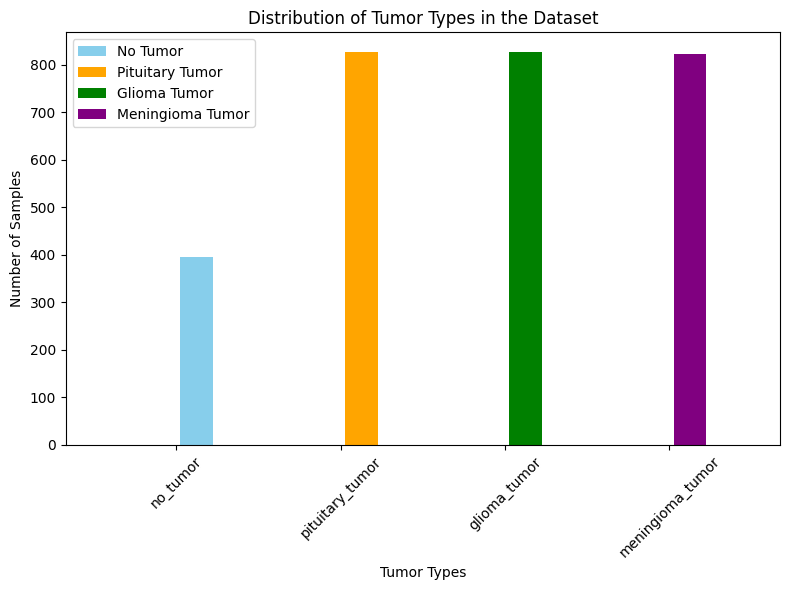

In [7]:

# Create a histogram of tumor types with different colors
tumor_labels = [dec[label] for label in Y]
colors = ['skyblue', 'orange', 'green', 'purple']
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for label, color in zip(classes.values(), colors):
    plt.hist(np.array(tumor_labels)[Y == label], bins=len(classes), align='mid', rwidth=0.8, color=color, label=dec[label])
plt.xlabel('Tumor Types')
plt.ylabel('Number of Samples')
plt.title('Distribution of Tumor Types in the Dataset')
plt.xticks(range(len(classes)), list(classes.keys()), rotation=45)
plt.legend()
plt.tight_layout()
plt.show() 

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Step 1: Predict on test data
y_pred = svm_model.predict(X_test)

# Step 2: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Step 3: Accuracy
accuracy = accuracy_score(y_test, y_pred) * 100

# Step 4: Sensitivity (Recall) and Specificity
sensitivity = tp / (tp + fn) * 100
specificity = tn / (tn + fp) * 100

# Step 5: Precision and F1 Score
precision = precision_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

# Step 6: Print Results
print("CONFUSION MATRIX ------------------")
print(cm)

print("\n============ TEST METRICS =============")
print(f"Accuracy   : {accuracy:.2f}%")
print(f"Sensitivity (Recall): {sensitivity:.2f}%")
print(f"Specificity: {specificity:.2f}%")
print(f"Precision  : {precision:.2f}%")
print(f"F1 Score   : {f1:.2f}%")


NameError: name 'svm_model' is not defined